# AI(ARTIFICIAL INTELLIGENCE) GROUP WORK CLASSIFICATION (ID3)

   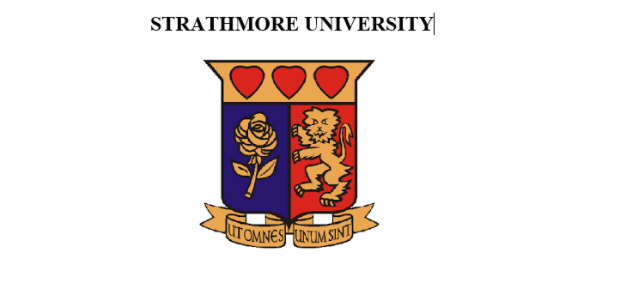

                                                    133834 Sarah Mongare
                                                    122790 Nicholas Bwalley
                                                    134879 Lesley Tulienge
                                                    133928 Millicent Cheptoi
                                                    124461 Angela Kinya
                                    Student (BBIT), School of Computing and Engineering Sciences, 
                                                 Strathmore University, Nairobi Kenya  

                                                submitted to:Desperia Kerre

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
zoo_dir = "C:/Users/Nick Bwalley/Documents/Classification And Regression Group Assignment/Classification And Regresstion Group Work/zoo.csv"
class_dir = "C:/Users/Nick Bwalley/Documents/Classification And Regression Group Assignment/Classification And Regresstion Group Work/class.csv"

data_zoo = pd.read_csv(zoo_dir)
data_class = pd.read_csv(class_dir)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (4149374262.py, line 1)

In [ ]:
display(data_zoo.head())
display(data_class)

In [ ]:
class_types = list(data_class['Class_Type'])
class_types

In [ ]:
class_map = {}
for i in range(data_class.shape[0]):        
    class_map[data_class['Class_Number'].iloc[i]] = data_class['Class_Type'].iloc[i]
    
class_map

In [ ]:
print(f"Total animals in zoo data is {len(data_zoo['animal_name'].unique())}")
print(f"Total animal in class data is {data_class['Number_Of_Animal_Species_In_Class'].sum()}")

In [ ]:
data = pd.merge(data_zoo, data_class, how='left', left_on='class_type', right_on='Class_Number')
data.head()

In [ ]:
## Droping columns that are repeating and not useful
data.drop(['Class_Number', 'Number_Of_Animal_Species_In_Class', 'Animal_Names'], axis=1, inplace=True)
data.head()

In [ ]:
plt.figure(figsize = (12,8))
plt.grid(True)
ax = sns.countplot(x='Class_Type', data=data, palette='Spectral_r')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.5))

The zoo data from each class needs to be equally ditributed among Train and Test Data While normall Splitting the data into Training and Test sets , there might be a case when all <br/>
the 4 Amphibians are in Train set or all the Amphibians are in Test set which will reduce our accuracy<br/>
So, what we will do is seprately split the data acoording to the animal type.

In [ ]:
# Seperating all the categories of animals in a dictionary
animal_type = {}
animal_category = data.Class_Type.unique()
print("Seperating Categories...")
for category in animal_category:
    animal_type[category] = data[data['Class_Type']==category]
print("Seperation completed")

In [ ]:
#Here we will split every category into trainig and test data
SPLIT = 0.85
train = pd.DataFrame() #to combine all the splited traning data from all categories
test = pd.DataFrame() #to combine all the splited test data from all categories
for category_name in animal_type:
    m = int(animal_type[category_name].shape[0] * SPLIT)
    train = pd.concat([train, animal_type[category_name].iloc[: m, :]])
    test = pd.concat([test, animal_type[category_name].iloc[m:, :]])

#Shuffling the train and test data randomly
train = train.sample(frac=1)
test = test.sample(frac=1)

In [ ]:
print(f"Training data shape = {train.shape}")
print(f"Training data shape = {test.shape}")

In [ ]:
plt.figure(figsize=(16,12))
matrix = np.triu(train.corr())
sns.heatmap(train.corr(), cmap='coolwarm', annot=True, fmt='.1g', mask=matrix)
plt.plot()

In [ ]:
train.head()

## Classification using Decision Tree Classifier

In [ ]:
# We have already split the data into 85% train and 15% test data
X_train = train.iloc[:,1:-2] # not using animal_name and class_type and Class_Type(category of animal)
y_train = train.iloc[:, -2] # class_type is the dependent feature
X_test = test.iloc[:, 1:-2]
y_test = test.iloc[:, -2]

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [ ]:
np.unique(y_pred), np.unique(y_test)
#To simply understand whether the prediction are atleast covering all the classes or not

In [ ]:
print(f"Accuracy score for validation test data is: = {metrics.accuracy_score(y_test, y_pred)}")
print(metrics.classification_report(y_test, y_pred))

In [ ]:
print(f"Accuracy score for validation test data is: = {metrics.accuracy_score(y_test, y_pred)*100,'%'}")

Though sometimes the accuracy might lower but there's a very small difference between the amphibian and reptiles.<br/>
But restarting the kernel and running all again can make the accuracy back to 100% 

In [ ]:
result = [class_map[i] for i in y_pred]
print("prediction values")
print(result)
print()
print("Real test y values")
print([class_map[i] for i in list(y_test)])

In [ ]:
final_prediction_df = X_test
final_prediction_df['class_type'] = [class_map[i] for i in y_test]
final_prediction_df['pred_class_type'] = [class_map[i] for i in y_pred]
final_prediction_df

In [ ]:
X_train.columns

In [ ]:
X_train.head(1)

NameError: name 'X_train' is not defined

In [ ]:
#tried manually with human feature values
predd = {}
predd['HAIR'] = 1
predd['FEATHERS'] = 0
predd['EGGS'] = 0
predd['MILK'] = 1
predd['AIRBORNE'] = 0
predd['AQUATIC'] = 0
predd['PREDATOR'] = 1
predd['TOOTHED'] = 1
predd['BACKBONE'] = 1
predd['BREATHES'] = 1
predd['VENOMOIS'] = 0
predd['FINS'] = 0
predd['LEGS'] = 2
predd['TAIL'] = 0
predd['DOMESTIC'] = 0
predd['CATSIZE'] = 0

pred_df = pd.DataFrame(data=predd, index=['value'])
custom_pred = clf.predict(pred_df)

In [ ]:
class_map[custom_pred[0]]

In [ ]:
class_map

In [ ]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))
_ = plot_tree(clf, feature_names=X_train.columns,  
                class_names=class_types, filled=True)


In [ ]:
from sklearn.tree import export_graphviz
import graphviz
# DOT data
dot_data = export_graphviz(clf, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names=class_types,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


In [ ]:
graph.render("decision_tree_graphivz")